In [1]:
#import Basic Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sb 


In [2]:
# import dataset
hotel_df = pd.read_csv("../data/hotelReservations.csv")
hotel_df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


# Data Cleaning
Let's now check for missing values within the existing dataset.



In [3]:
# Checking for empty values
hotel_df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

There are no NULL values in this Dataset. Great!

We will also remove the Booking_ID column as there are already existing index values

In [4]:
hotel_df = hotel_df.drop(columns=['Booking_ID'])

Lets now split the data to categorical and numeric values. 

# Categorical 

`no_of_adults:` Number of adults

`no_of_children:` Number of Children

`no_of_weekend_nights:` Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

`no_of_week_nights:` Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

`type_of_meal_plan:` Type of meal plan booked by the customer:

`required_car_parking_space:` Does the customer require a car parking space? (0 - No, 1- Yes)

`room_type_reserved:` Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.

`market_segment_type:` Market segment designation.

`repeated_guest:` Is the customer a repeated guest? (0 - No, 1- Yes)

`no_of_previous_cancellations:` Number of previous bookings that were canceled by the customer prior to the current booking

`no_of_special_requests:` Total number of special requests made by the customer (e.g. high floor, view from the room, etc)

`booking_status:` Flag indicating if the booking was canceled or not.


# Numeric 

`lead_time:` Number of days between the date of booking and the arrival date

`arrival_date:` Date of the month

`no_of_previous_bookings_not_canceled:` Number of previous bookings not canceled by the customer prior to the current booking

`avg_price_per_room:` Average price per day of the reservation; prices of the rooms are dynamic. (in euros)



# Categorical Data Visualisation

Text(0, 0.5, 'Counting values')

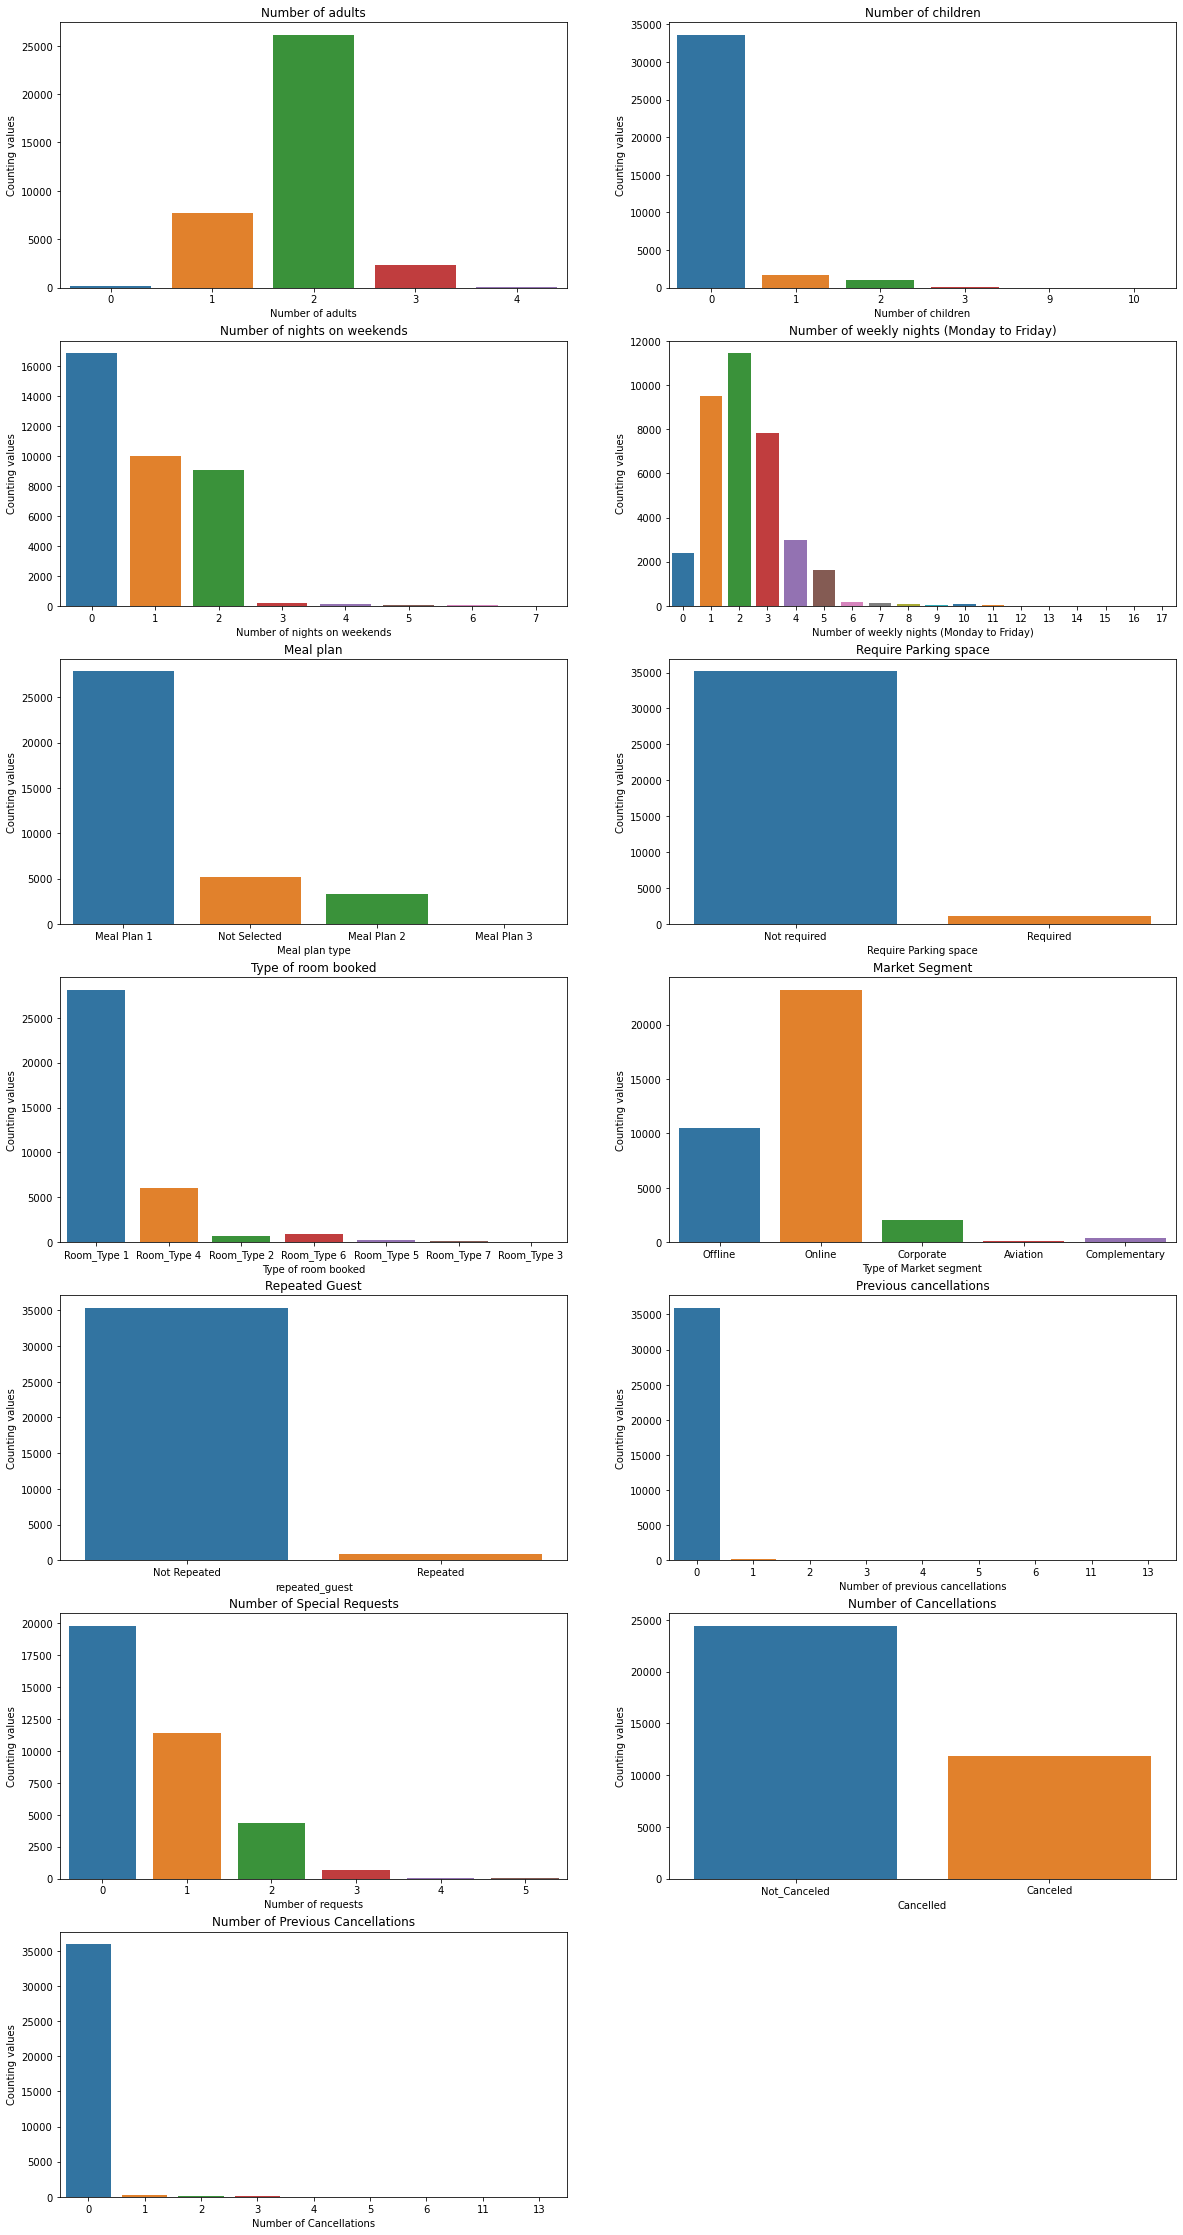

In [5]:
plt.figure(figsize = (20,40))

plt.subplot(7,2,1)
plt.gca().set_title('Number of adults')
sb.countplot(x = 'no_of_adults', palette = 'tab10', data = hotel_df)
plt.xlabel('Number of adults')
plt.ylabel('Counting values')

plt.subplot(7,2,2)
plt.gca().set_title('Number of children')
sb.countplot(x = 'no_of_children', palette = 'tab10', data = hotel_df)
plt.xlabel('Number of children')
plt.ylabel('Counting values')

plt.subplot(7,2,3)
plt.gca().set_title('Number of nights on weekends')
sb.countplot(x = 'no_of_weekend_nights', palette = 'tab10', data = hotel_df)
plt.xlabel('Number of nights on weekends')
plt.ylabel('Counting values')

plt.subplot(7,2,4)
plt.gca().set_title('Number of weekly nights (Monday to Friday)')
sb.countplot(x = 'no_of_week_nights', palette = 'tab10', data = hotel_df)
plt.xlabel('Number of weekly nights (Monday to Friday)')
plt.ylabel('Counting values')

plt.subplot(7,2,5)
plt.gca().set_title('Meal plan')
sb.countplot(x = 'type_of_meal_plan', palette = 'tab10', data = hotel_df)
plt.xlabel('Meal plan type')
plt.ylabel('Counting values')

plt.subplot(7,2,6)
plt.gca().set_title('Require Parking space')
sb.countplot(x = 'required_car_parking_space', palette = 'tab10', data = hotel_df)
plt.xticks(ticks=[0, 1], labels=['Not required', 'Required'])
plt.xlabel('Require Parking space')
plt.ylabel('Counting values')

plt.subplot(7,2,7)
plt.gca().set_title('Type of room booked')
sb.countplot(x = 'room_type_reserved', palette = 'tab10', data = hotel_df)
plt.xlabel('Type of room booked')
plt.ylabel('Counting values')

plt.subplot(7,2,8)
plt.gca().set_title('Market Segment')
sb.countplot(x = 'market_segment_type', palette = 'tab10', data = hotel_df)
plt.xlabel('Type of Market segment')
plt.ylabel('Counting values')

plt.subplot(7,2,9)
plt.gca().set_title('Repeated Guest')
sb.countplot(x = 'repeated_guest', palette = 'tab10', data = hotel_df)
plt.xticks(ticks=[0, 1], labels=['Not Repeated', 'Repeated'])
plt.ylabel('Counting values')

plt.subplot(7,2,10)
plt.gca().set_title('Previous cancellations')
sb.countplot(x = 'no_of_previous_cancellations', palette = 'tab10', data = hotel_df)
plt.xlabel('Number of previous cancellations')
plt.ylabel('Counting values')

plt.subplot(7,2,11)
plt.gca().set_title('Number of Special Requests')
sb.countplot(x = 'no_of_special_requests', palette = 'tab10', data = hotel_df)
plt.xlabel('Number of requests')
plt.ylabel('Counting values')

plt.subplot(7,2,12)
plt.gca().set_title('Number of Cancellations')
sb.countplot(x = 'booking_status', palette = 'tab10', data = hotel_df)
plt.xlabel('Cancelled')
plt.ylabel('Counting values')

plt.subplot(7,2,13)
plt.gca().set_title('Number of Previous Cancellations')
sb.countplot(x = 'no_of_previous_cancellations', palette = 'tab10', data = hotel_df)
plt.xlabel('Number of Cancellations')
plt.ylabel('Counting values')



Looking at the categorical data, some analysis of the initial data can be made.
1. Almost all bookings had 1-3 adults and less than 2 children, with a significant portion with 2 adults. This is likely due to most rooms being double rooms with max occupancy of 2 adults and 2 children.
2. Most bookings had 2 or less weeknights. This is probably as they were less than 7 days. Similarly, almost all bookings had less than 5 weekdays.
3. There were a significantly small portion of bookings that required parking space, were repeated guests, or had previous cancellations. Hence, these data would not lead to conclusive results towards determining its relationship with booking cancellations.
4. Almost all bookings had no past cancellations


# Numeric Data Visualisation

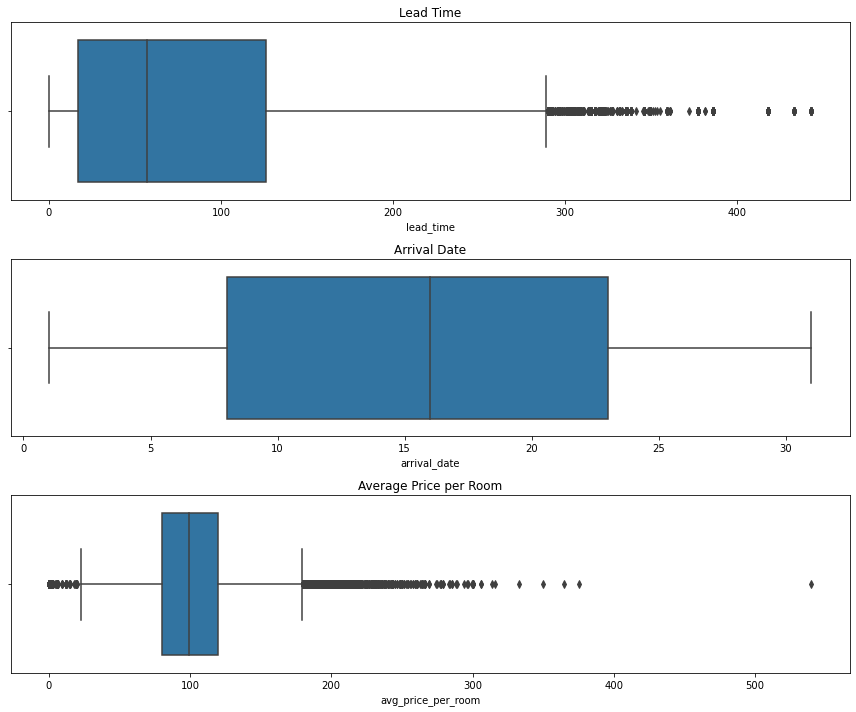

In [6]:
# Set up subplots
fig, axes = plt.subplots(nrows=3, figsize=(12, 10))

# Plot boxplot for lead_time
sb.boxplot(x='lead_time', data=hotel_df, ax=axes[0])
axes[0].set_title('Lead Time')

# Plot boxplot for arrival_date
sb.boxplot(x='arrival_date', data=hotel_df, ax=axes[1])
axes[1].set_title('Arrival Date')


# Plot boxplot for avg_price_per_room
sb.boxplot(x='avg_price_per_room', data=hotel_df, ax=axes[2])
axes[2].set_title('Average Price per Room')

plt.tight_layout()
plt.show()


In [7]:
lead_Q1 = hotel_df['lead_time'].quantile(0.25)
print(f"Lead time Q1 = {lead_Q1}")
lead_Q3 = hotel_df['lead_time'].quantile(0.75)
print(f"Lead time Q3 = {lead_Q3}")
median_lead = hotel_df['lead_time'].median()
print(f"Lead time median = {median_lead}")
mean_lead = hotel_df['lead_time'].median()
print(f"Lead time mean = {mean_lead}")

print()

arrival_Q1 = hotel_df['arrival_date'].quantile(0.25)
print(f"Arrival Date Q1 = {arrival_Q1}")
arrival_Q3 = hotel_df['arrival_date'].quantile(0.75)
print(f"Arrival Date Q3 = {arrival_Q3}")
median_arrival = hotel_df['arrival_date'].median()
print(f"Arrival Date median = {median_arrival}")
mean_arrival = hotel_df['arrival_date'].median()
print(f"Arrival Date mean = {mean_arrival}")

print()

price_Q1 = hotel_df['avg_price_per_room'].quantile(0.25)
print(f"Avg Price Q1 = {price_Q1}")
price_Q3 = hotel_df['avg_price_per_room'].quantile(0.75)
print(f"Avg Price Q3 = {price_Q3}")
median_price = hotel_df['avg_price_per_room'].median()
print(f"Avg Price median = {median_price}")
mean_price = hotel_df['avg_price_per_room'].median()
print(f"Avg Price mean = {mean_price}")



Lead time Q1 = 17.0
Lead time Q3 = 126.0
Lead time median = 57.0
Lead time mean = 57.0

Arrival Date Q1 = 8.0
Arrival Date Q3 = 23.0
Arrival Date median = 16.0
Arrival Date mean = 16.0

Avg Price Q1 = 80.3
Avg Price Q3 = 120.0
Avg Price median = 99.45
Avg Price mean = 99.45


Looking at the numerical values, we can make the following findings.
1. Most bookings happen around 17-125 days before check-in.
2. Most arrivals occur in the middle of the month (8th - 23rd of the month)
2. Most rooms are priced between $80-$120 

# Bivariate Analysis - Booking Status against others

To understand the relationship between each attribute of a booking with the potential of a cancellation, we will plot Kernal Density Estimation (KDE) graphs for each variable with regards to booking_status

To do this, we must first convert all non-numeric values to numerical values.


In [8]:
# Convert all non-numeric columns to numeric
numeric_df = hotel_df.copy()
numeric_df['type_of_meal_plan'].unique()
numeric_df['type_of_meal_plan'] = numeric_df['type_of_meal_plan'].map({'Not Selected': 0, 'Meal Plan 1': 1, 'Meal Plan 2': 2, 'Meal Plan 3': 3})

numeric_df['room_type_reserved'].unique()
numeric_df['room_type_reserved'] = numeric_df['room_type_reserved'].map({'Room_Type 1': 1, 'Room_Type 2': 2, 'Room_Type 3': 3, 'Room_Type 4': 4, 'Room_Type 5': 5, 'Room_Type 6': 6, 'Room_Type 7': 7})

numeric_df['market_segment_type'].unique()
numeric_df['market_segment_type'] = numeric_df['market_segment_type'].map({'Offline': 0,'Online': 1,'Corporate': 2,'Aviation': 3,'Complementary': 4,})

numeric_df['booking_status'].unique()
numeric_df['booking_status'] = numeric_df['booking_status'].map({'Not_Canceled': 0, 'Canceled': 1})
numeric_df.head(3)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,1,0,1,224,2017,10,2,0,0,0,0,65.00,0,0
1,2,0,2,3,0,0,1,5,2018,11,6,1,0,0,0,106.68,1,0
2,1,0,2,1,1,0,1,1,2018,2,28,1,0,0,0,60.00,0,1


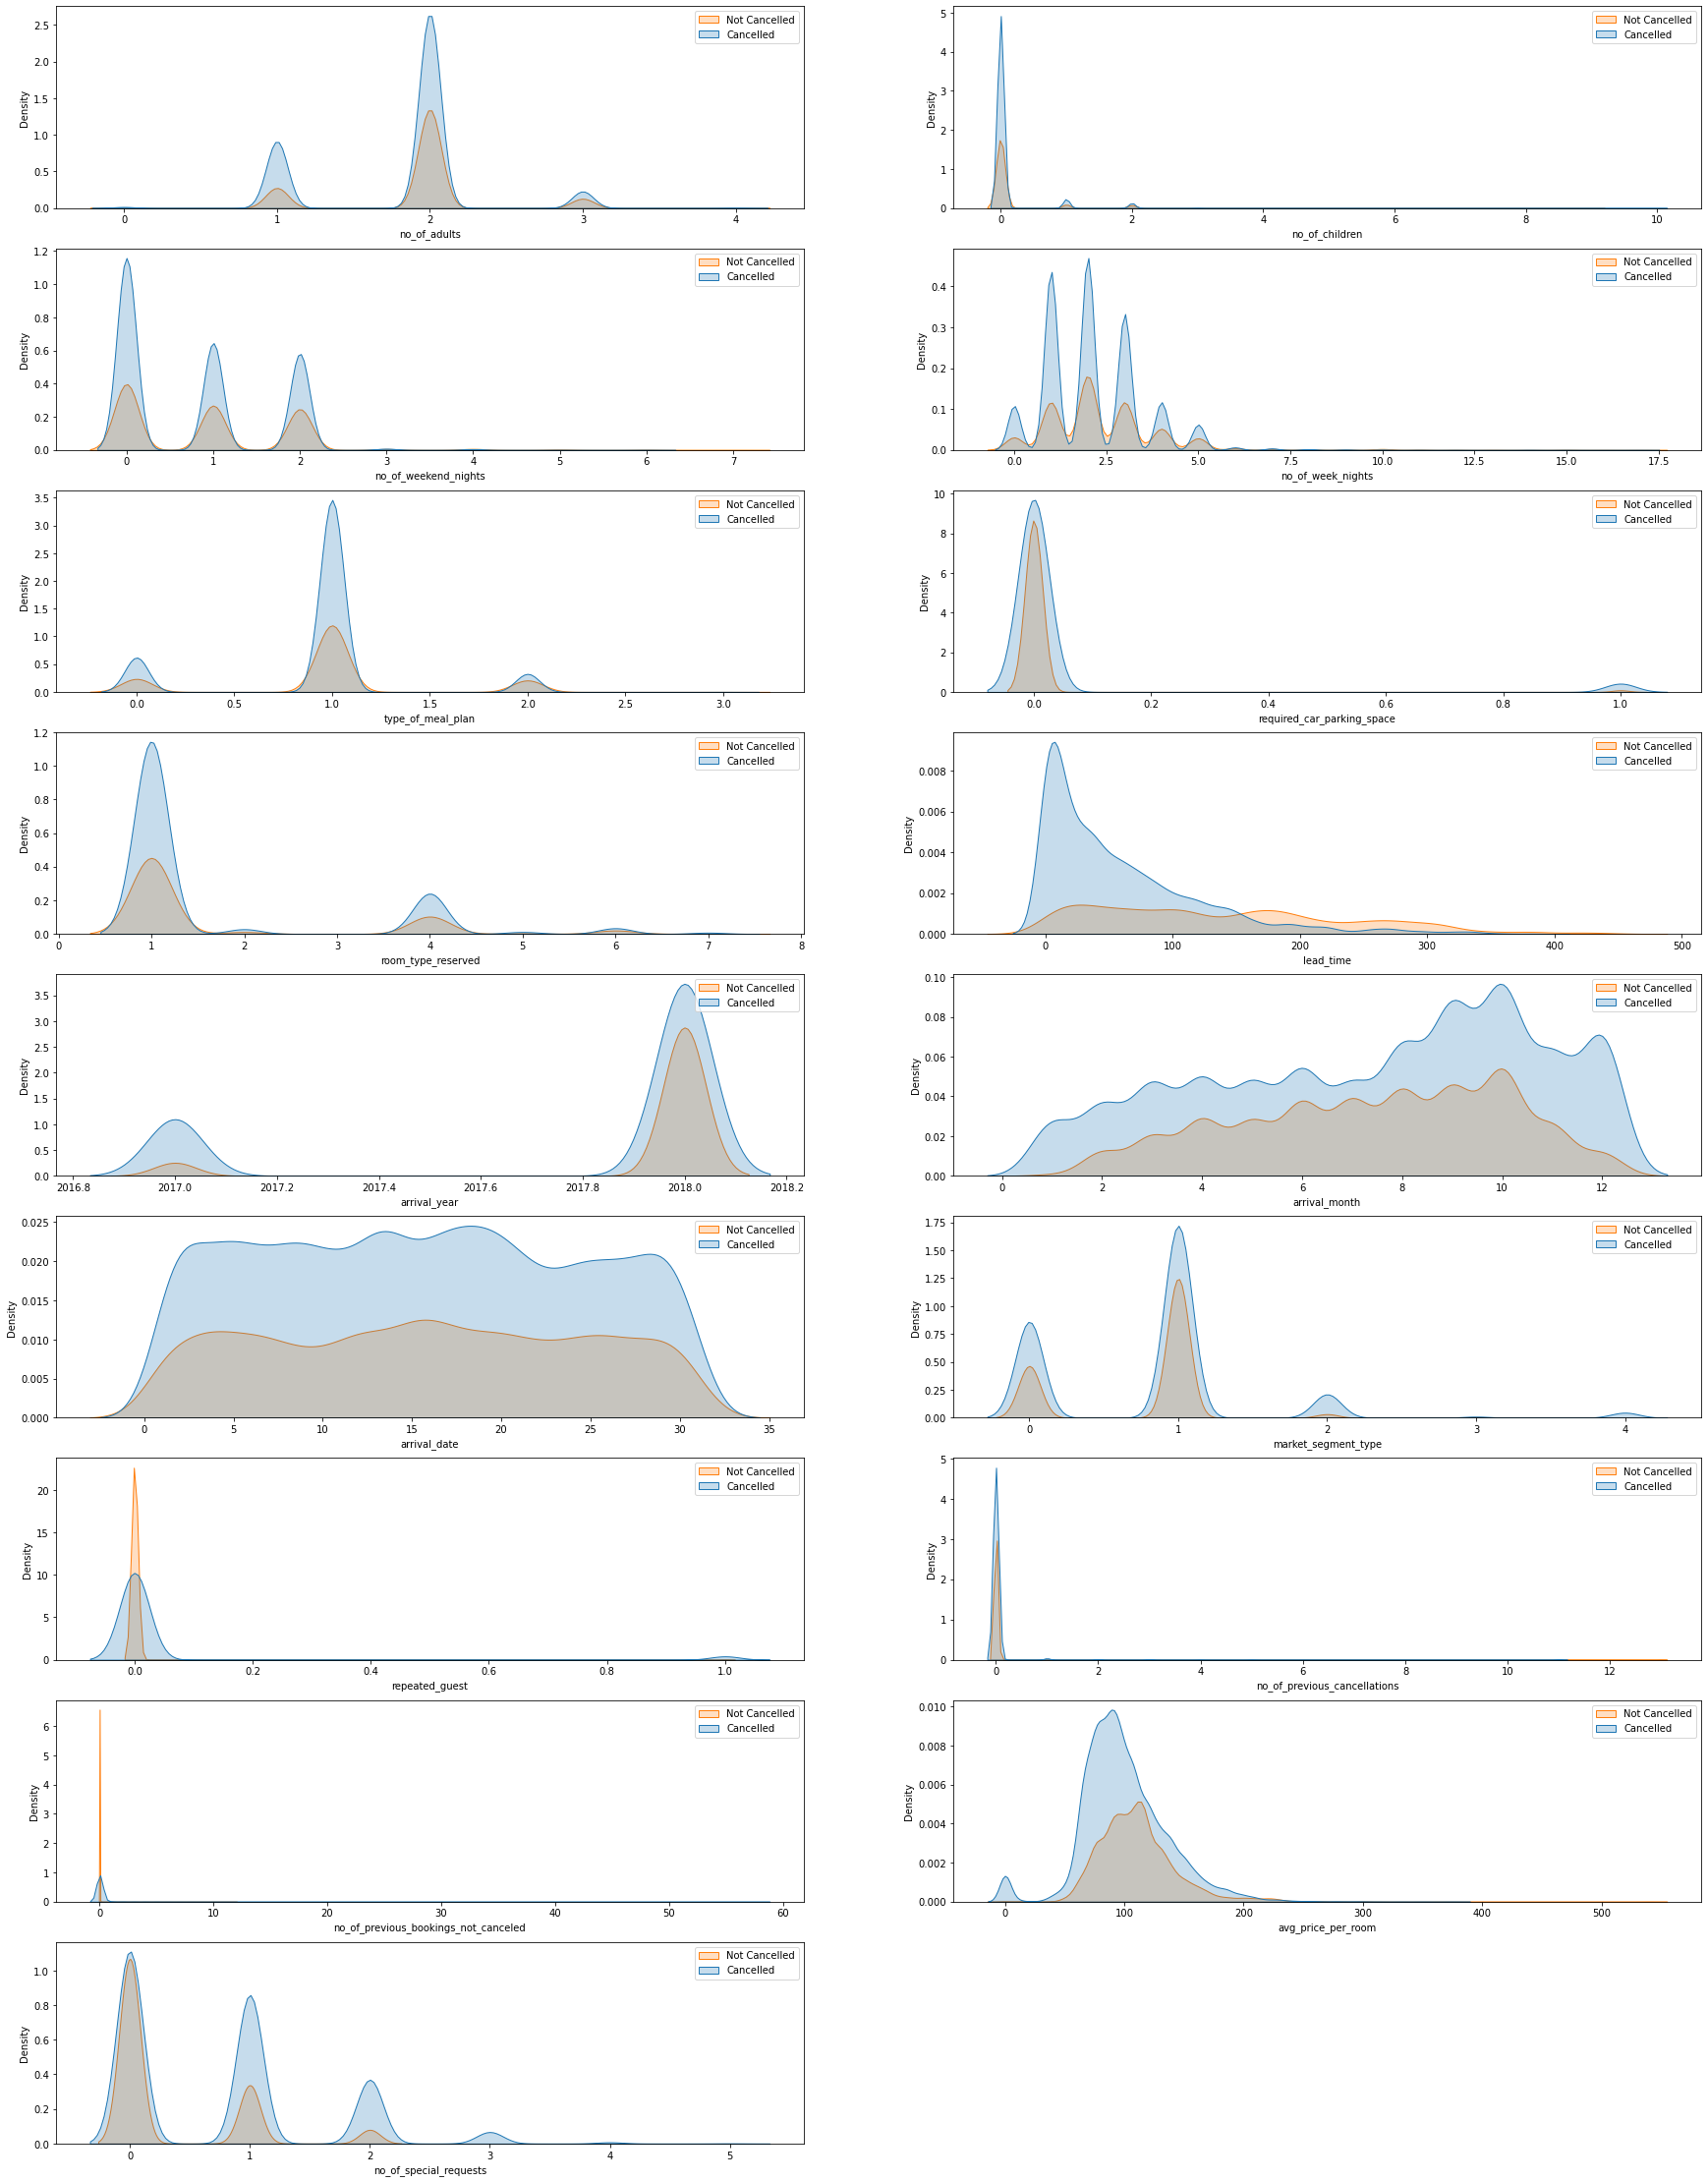

In [9]:
import warnings

warnings.filterwarnings('ignore')

plt.figure(figsize=(30, 40))

numerical_col = numeric_df.drop(columns=['booking_status']).columns
for i, col in enumerate(numerical_col):
    plt.subplot(9,2,i+1)
    sb.kdeplot(x=col, hue = 'booking_status', data = numeric_df, shade = True)
    plt.legend(labels=['Not Cancelled', 'Cancelled'])
    

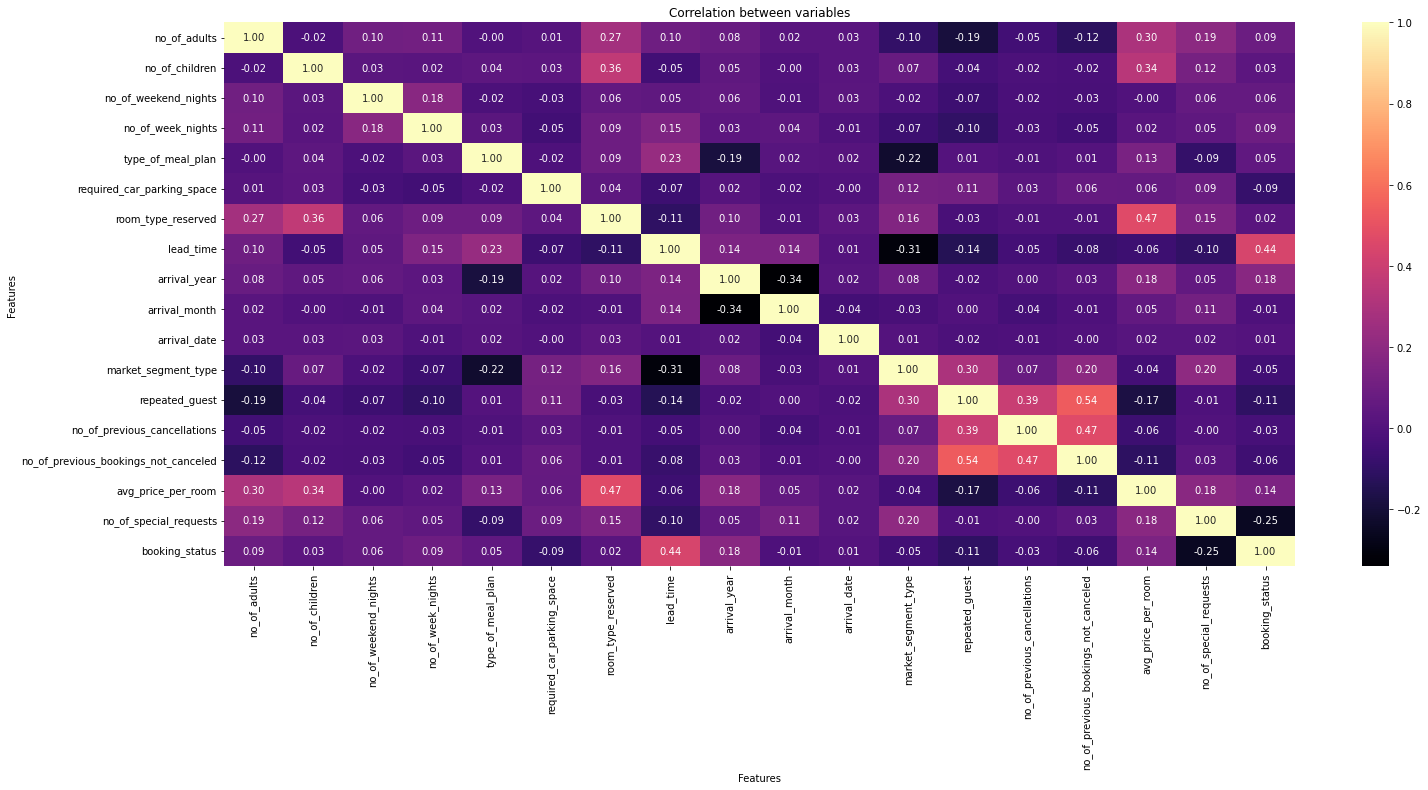

In [10]:
fig, ax = plt.subplots(figsize=(24, 10))
sb.heatmap(numeric_df.corr(), annot = True, cmap = 'magma',fmt='.2f')
plt.gca().set_title('Correlation between variables')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()


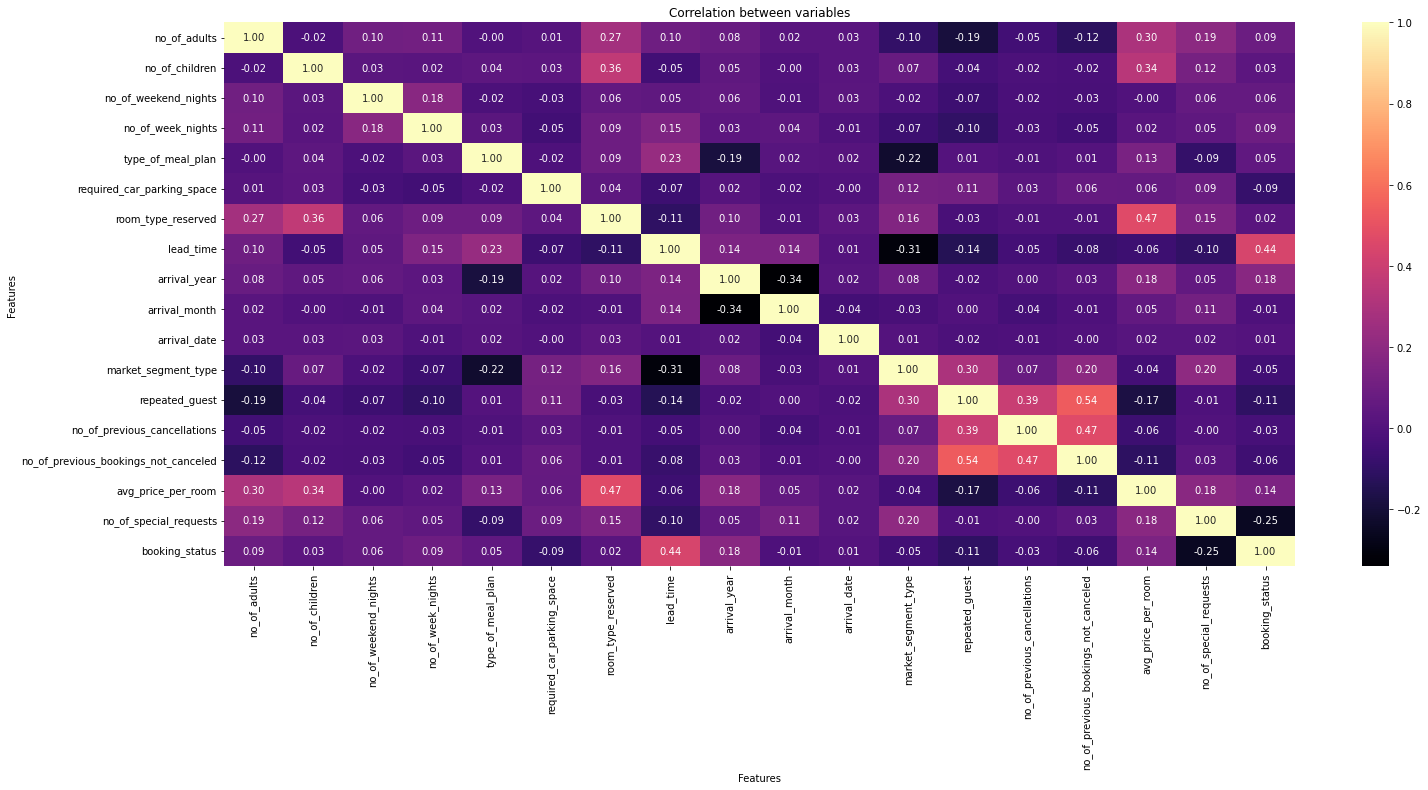

In [11]:
fig, ax = plt.subplots(figsize=(24, 10))
sb.heatmap(numeric_df.corr(), annot = True, cmap = 'magma',fmt='.2f')
plt.gca().set_title('Correlation between variables')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

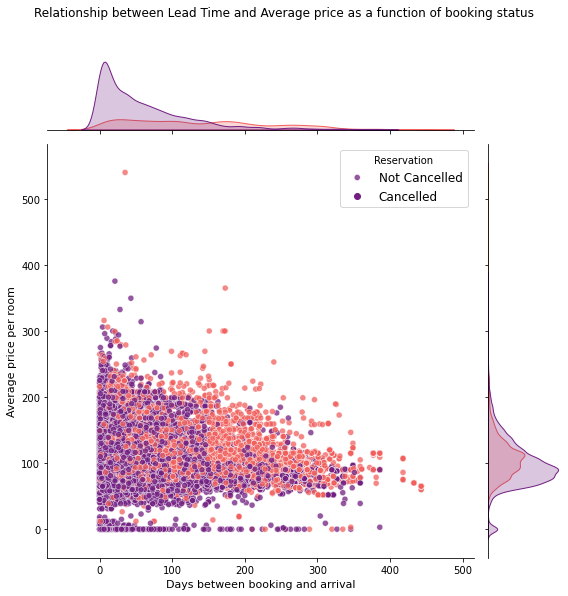

In [12]:
# Create the jointplot
jnt = sb.jointplot(data=numeric_df, x='lead_time', y='avg_price_per_room', 
                   hue='booking_status', alpha=0.75, palette='magma', height=8)

# Set the title and adjust its position and size
jnt.fig.suptitle('Relationship between Lead Time and Average price as a function of booking status', y=1.03, fontsize=12)

# Set the x and y labels with larger font sizes
jnt.ax_joint.set_xlabel('Days between booking and arrival', fontsize=11)
jnt.ax_joint.set_ylabel('Average price per room', fontsize=11)

# Adjust the position and size of the legend
jnt.ax_joint.legend(loc='upper right', title='Reservation', prop={'size': 11})

# Remove the old legend
jnt.ax_joint.get_legend().remove()

# Create a new legend with the desired labels
jnt.ax_joint.legend(title='Reservation', labels=['Not Cancelled', 'Cancelled'], loc='upper right', prop={'size': 12})

# Adjust the layout to make sure everything fits
plt.tight_layout()

Generally, higher lead time leads to more cancellations

high price + high lead time leads to more cancellations